<a href="https://colab.research.google.com/github/eman-kom/tensorflow-fundamentals/blob/main/10_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-13 11:35:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-08-13 11:35:53 (66.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import with Pandas

In [2]:
 import pandas as pd

 df = pd.read_csv(
    "/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]
    )
 
 df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


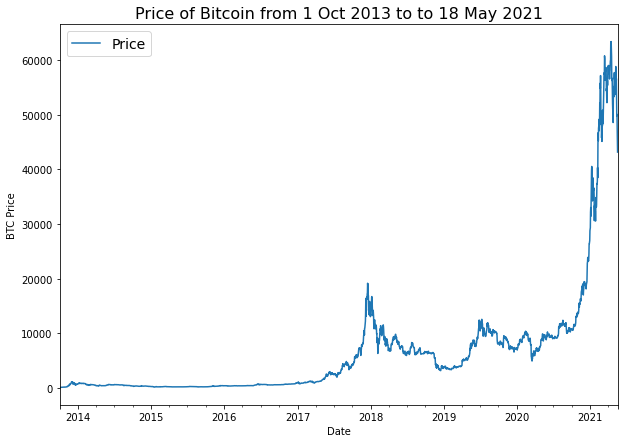

In [6]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Import with Python CSV Module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

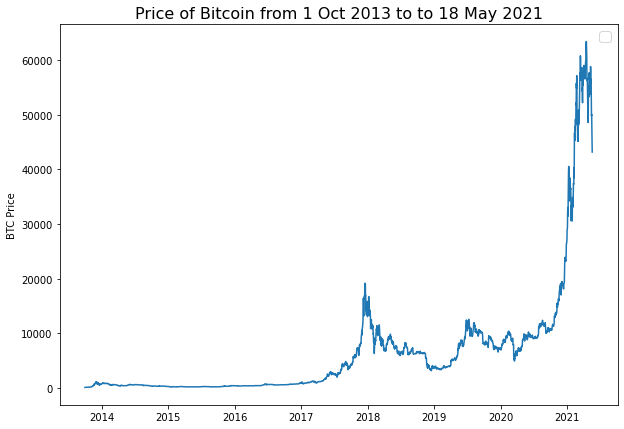

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Split the data into train and test

In [9]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

split_size = int(0.8 * len(btc_price))

X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

In [10]:
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format="o", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize=14)

  plt.grid(True)

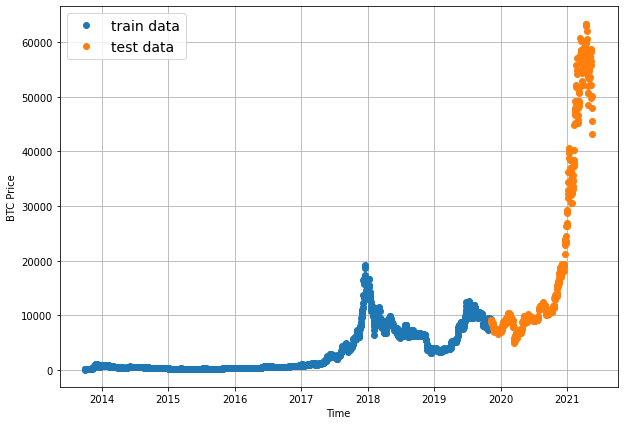

In [11]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="train data")
plot_time_series(X_test, y_test, label="test data")

# Model 0: Baseline Naive Model

Using the data in the previous timestep as the prediction

-> shift the data by 1 timestep

In [12]:
naive_forecast = y_test[:-1]

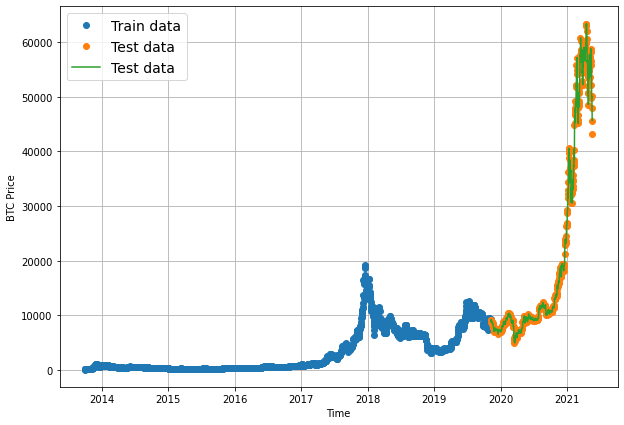

In [13]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")
plot_time_series(X_test[1:], naive_forecast, format="-", label="Test data")

In [14]:
import tensorflow as tf
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [15]:
mean_absolute_scaled_error(np.array(y_test[1:]), np.array(naive_forecast)).numpy()

0.9995699939182624

In [16]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim > 0:
      mae = tf.reduce_mean(mae)
      mse = tf.reduce_mean(mse)
      rmse = tf.reduce_mean(rmse)
      mape = tf.reduce_mean(mape)
      mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [17]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

# Format data part 2: Windowing & splitting

In [18]:
HORIZON = 1
WINDOW_SIZE = 7

In [19]:
# create windows the fast way with numpy indexing
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  # step 1: create a window of specific window size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # step 2: create 2d array of multiple window steps (minus 1 for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # print(f"Window Indexes:\n{window_indexes}")

  # step 3: index on target array with 2d array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # step 4: get the labelled windows
  windows, labels = windowed_array[:, :-horizon], windowed_array[:, -horizon:]

  return windows, labels

make_windows(prices, WINDOW_SIZE, HORIZON)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [20]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [21]:
windows, labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# Create modelling checkpoint

In [22]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=os.path.join(save_path, model_name),
      verbose=0,
      save_best_only=True
  )

# Model 1: Dense Model (windows = 7, horizon = 1)

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(7, ))
layer_1 = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(1, activation="linear")(layer_1)

model_1 = keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

model_1.fit(
    train_windows,
    train_labels,
    epochs=100,
    validation_data=(test_windows, test_labels),
    batch_size=128,
    verbose=1,
    callbacks=[create_model_checkpoint(model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 6s 97ms/step - loss: 1917.3939 - val_loss: 1175.6957
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 405.0549 - val_loss: 2110.2324
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 251.9070 - val_loss: 1098.3184
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 189.6497 - val_loss: 1116.3881
Epoch 5/100
18/18 [==============================] - 1s 40ms/step - loss: 183.9187 - val_loss: 1027.7024
Epoch 6/100
18/18 [==============================] - 1s 47ms/step - loss: 179.2523 - val_loss: 999.4579
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 173.4776 - val_loss: 1017.9344
Epoch 8/100
18/18 [==============================] - 1s 57ms/step - loss: 171.3737 - val_loss: 971.7604
Epoch 9/100
18/18 [==============================] - 1s 51ms/step - loss: 172.4159 - val_loss: 924.5751
Epoch 10/100
18/18 [==============================] - 0s 6m

In [24]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.2651


569.26513671875

In [25]:
model_1_preds = tf.squeeze(model_1.predict(test_windows))

In [26]:
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)

model_1_results

{'mae': 569.26514,
 'mape': 2.5702116,
 'mase': 1.0000411,
 'mse': 1177874.2,
 'rmse': 1085.2992}

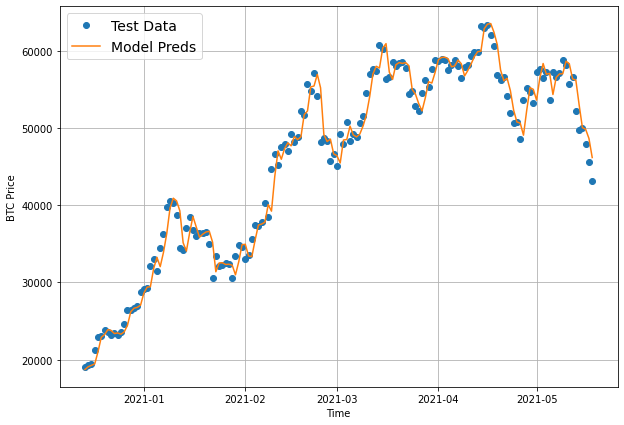

In [27]:
offset = 400
plt.figure(figsize=(10, 7))

plot_time_series(
    X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    X_test[-len(test_windows):],
    values=tf.expand_dims(model_1_preds, axis=1)[:, 0],
    start=offset,
    format="-",
    label="Model Preds"
)

# Model 2: Dense Model (windows = 30, horizon = 1)

In [28]:
HORIZON = 1
WINDOW_SIZE = 30

windows, labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [29]:
inputs = keras.Input(shape=(WINDOW_SIZE, ))
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON, activation="linear")(x)

model_2 = keras.Model(inputs, outputs, name="model_2_dense")

model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

model_2.fit(
    train_windows,
    train_labels,
    validation_data=(test_windows, test_labels),
    epochs=100,
    batch_size=128,
    verbose=0,
    callbacks=[create_model_checkpoint(model_2.name)]
)

In [30]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1031.1960


1031.196044921875

In [31]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.7040


605.7039794921875

In [32]:
model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_2_preds
)

model_2_results

{'mae': 605.7039,
 'mape': 2.7885854,
 'mase': 1.0587764,
 'mse': 1241676.6,
 'rmse': 1114.3054}

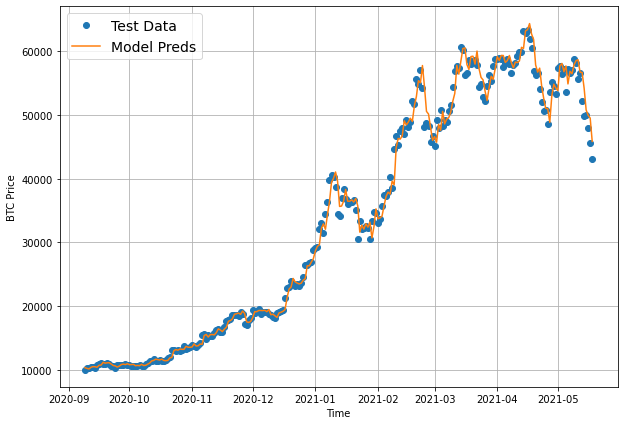

In [33]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    X_test[-len(test_windows):],
    values=tf.expand_dims(model_2_preds, axis=1)[:, 0],
    start=offset,
    format="-",
    label="Model Preds"
)

# Model 3: Dense (window = 30, horizon = 7)

In [34]:
HORIZON = 7
WINDOW_SIZE = 30

In [35]:
windows, labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [36]:
inputs = layers.Input(shape=(WINDOW_SIZE, ))
layer_1 = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(layer_1)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_dense")

model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    validation_data=(test_windows, test_labels),
    verbose=0,
    batch_size=128,
    callbacks=[create_model_checkpoint(model_3.name)]
)

In [37]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1263.3250


1263.324951171875

In [38]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.5212


1234.521240234375

In [39]:
model_3_preds = tf.squeeze(model_3.predict(test_windows))

model_3_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_3_preds
)

model_3_results

{'mae': 1234.5211,
 'mape': 5.5633516,
 'mase': 2.1967614,
 'mse': 5281136.5,
 'rmse': 1423.7833}

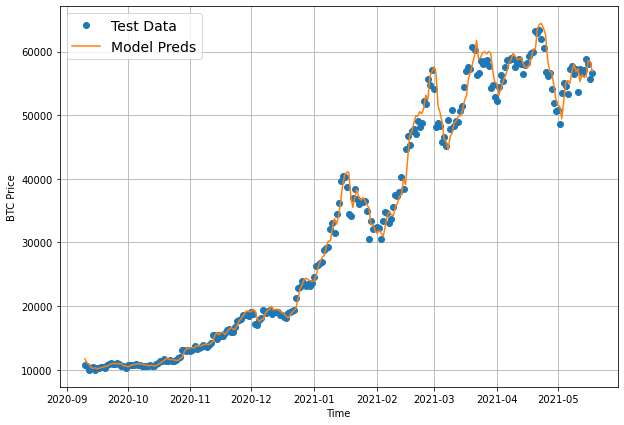

In [40]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    X_test[-len(test_windows):],
    values=tf.expand_dims(tf.reduce_mean(model_3_preds, axis=1), axis=1)[:, 0],
    start=offset,
    format="-",
    label="Model Preds"
)

# Comparing the first 4 models

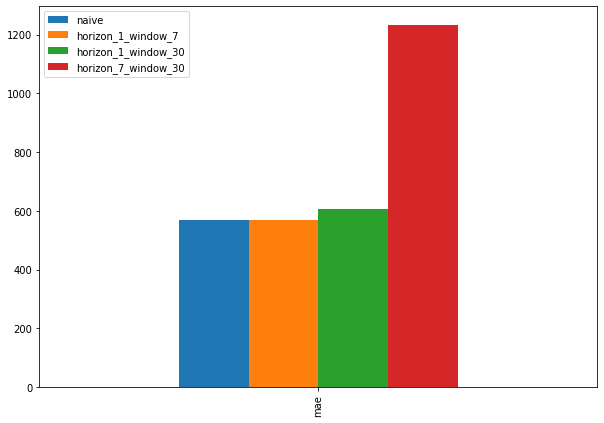

In [41]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"],
}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

# Model 4: Conv1D

In [42]:
HORIZON = 1
WINDOW_SIZE = 7

In [43]:
windows, labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [44]:
inputs = layers.Input(shape=(WINDOW_SIZE, ))
expanded_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
layer_1 = layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu")(expanded_dim_layer)
outputs = layers.Dense(HORIZON)(layer_1)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_conv1D")

model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

model_4.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=0,
    validation_data=(test_windows, test_labels),
    batch_size=128,
    callbacks=[create_model_checkpoint(model_4.name)]
)

In [45]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 654.5541


654.5540771484375

In [47]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.1154


565.1154174804688

In [48]:
model_4_preds = tf.squeeze(model_4.predict(test_windows))

model_4_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_4_preds
)

model_4_results

{'mae': 565.1154,
 'mape': 2.5239146,
 'mase': 0.99275124,
 'mse': 1156398.5,
 'rmse': 1075.3597}

# Model 5: LSTM

In [49]:
HORIZON = 1
WINDOW_SIZE = 7

In [50]:
windows, labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [51]:
inputs = layers.Input(shape=(WINDOW_SIZE, ))
expanded_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
layer_1 = layers.LSTM(128, return_sequences=True, activation="relu")(expanded_dims_layer)
layer_2 = layers.LSTM(128, activation="relu")(layer_1)
outputs = layers.Dense(HORIZON)(layer_2)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_5.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2835.0583

18/18 [==============================] - 5s 183ms/step - loss: 2835.0583 - val_loss: 15135.6279
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 1685.7723

18/18 [==============================] - 3s 175ms/step - loss: 1508.3470 - val_loss: 1116.3674
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 281.9819 - val_loss: 1321.3792
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 184.0050

18/18 [==============================] - 3s 158ms/step - loss: 183.5306 - val_loss: 999.5968
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 178.1418 - val_loss: 1017.1152
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 187.4535 - val_loss: 1104.4016
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 185.3651

18/18 [==============================] - 3s 179ms/step - loss: 181.8651 - val_loss: 964.3789
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 170.8879 - val_loss: 1035.9788
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 182.3655 - val_loss: 1050.2788
Epoch 10/100
18/18 [==============================] - 0s 9ms/step - loss: 181.2744 - val_loss: 1143.0897
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 181.5619 - val_loss: 1051.5452
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 185.7704 - val_loss: 1023.7208
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 183.1104 - val_loss: 1018.6379
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 181.8281 - val_loss: 1021.9081
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 177.5361 - val_loss: 991.4682
Epoch 16/100
18/18 [==============================] - 0s 10ms/step

18/18 [==============================] - 3s 161ms/step - loss: 171.0388 - val_loss: 954.5854
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 176.1258 - val_loss: 962.0923
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 169.7713

18/18 [==============================] - 3s 181ms/step - loss: 169.6759 - val_loss: 913.7692
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 165.8034

18/18 [==============================] - 3s 165ms/step - loss: 164.6990 - val_loss: 890.2461
Epoch 21/100
18/18 [==============================] - 0s 9ms/step - loss: 161.1668 - val_loss: 896.6080
Epoch 22/100
18/18 [==============================] - 0s 9ms/step - loss: 155.7475 - val_loss: 952.2165
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 152.9929

18/18 [==============================] - 3s 191ms/step - loss: 152.7337 - val_loss: 825.3110
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 151.2636

18/18 [==============================] - 3s 161ms/step - loss: 149.3824 - val_loss: 805.5895
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 152.9859

18/18 [==============================] - 4s 215ms/step - loss: 150.5954 - val_loss: 802.1728
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 137.8431

18/18 [==============================] - 3s 165ms/step - loss: 141.6262 - val_loss: 770.3356
Epoch 27/100
18/18 [==============================] - 0s 10ms/step - loss: 142.0781 - val_loss: 785.4523
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 153.8827

18/18 [==============================] - 3s 183ms/step - loss: 152.0238 - val_loss: 749.0220
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 139.4607

18/18 [==============================] - 3s 162ms/step - loss: 139.3445 - val_loss: 734.0231
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4448

18/18 [==============================] - 3s 183ms/step - loss: 131.9276 - val_loss: 719.2014
Epoch 31/100
18/18 [==============================] - 0s 10ms/step - loss: 129.4118 - val_loss: 725.0233
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 130.4928

18/18 [==============================] - 3s 164ms/step - loss: 130.1669 - val_loss: 704.6939
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 136.5435 - val_loss: 875.5280
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 130.4498

18/18 [==============================] - 3s 183ms/step - loss: 130.2927 - val_loss: 695.0261
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 128.0374 - val_loss: 761.1411
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 135.3583 - val_loss: 744.6118
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 132.5027

18/18 [==============================] - 3s 162ms/step - loss: 128.0140 - val_loss: 664.7735
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 120.4780

18/18 [==============================] - 3s 181ms/step - loss: 121.3200 - val_loss: 656.0449
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 123.5569 - val_loss: 713.8704
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 126.6805 - val_loss: 668.2296
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 122.0442 - val_loss: 705.4567
Epoch 42/100
14/18 [======================>.......] - ETA: 0s - loss: 120.6413

18/18 [==============================] - 3s 163ms/step - loss: 122.0729 - val_loss: 651.8632
Epoch 43/100
18/18 [==============================] - 0s 10ms/step - loss: 119.5198 - val_loss: 683.7370
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 130.0547

18/18 [==============================] - 3s 182ms/step - loss: 125.6495 - val_loss: 643.3057
Epoch 45/100
18/18 [==============================] - 0s 10ms/step - loss: 122.5404 - val_loss: 643.7916
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 119.7447 - val_loss: 646.7115
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 117.6447

18/18 [==============================] - 3s 163ms/step - loss: 119.6355 - val_loss: 640.9951
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 120.5045 - val_loss: 673.1855
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 123.8102 - val_loss: 668.9657
Epoch 50/100
15/18 [========================>.....] - ETA: 0s - loss: 120.4656

18/18 [==============================] - 4s 244ms/step - loss: 118.1027 - val_loss: 627.8533
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 117.0606 - val_loss: 674.8830
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 114.1821

18/18 [==============================] - 3s 163ms/step - loss: 116.4961 - val_loss: 623.6195
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 123.4514 - val_loss: 698.1932
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 116.6405

18/18 [==============================] - 3s 182ms/step - loss: 116.1769 - val_loss: 622.3278
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6307 - val_loss: 633.8741
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 116.8095 - val_loss: 653.2859
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 117.9597 - val_loss: 629.3963
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 116.5917 - val_loss: 643.7540
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 114.6288 - val_loss: 628.3549
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 116.6253 - val_loss: 637.2620
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 113.1136 - val_loss: 623.3672
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 116.7695

18/18 [==============================] - 3s 165ms/step - loss: 114.5757 - val_loss: 615.3277
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6384 - val_loss: 618.6620
Epoch 64/100
14/18 [======================>.......] - ETA: 0s - loss: 112.8398

18/18 [==============================] - 3s 165ms/step - loss: 113.1574 - val_loss: 607.0154
Epoch 65/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0642 - val_loss: 729.9648
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 119.6245 - val_loss: 691.6133
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 119.4282

18/18 [==============================] - 3s 186ms/step - loss: 119.9071 - val_loss: 604.2133
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 112.9986 - val_loss: 613.0877
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 112.2479 - val_loss: 623.4889
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 112.9443 - val_loss: 628.4484
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1151 - val_loss: 613.8953
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7479 - val_loss: 688.9578
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7454 - val_loss: 615.4250
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 111.8237

18/18 [==============================] - 3s 162ms/step - loss: 114.0737 - val_loss: 597.9750
Epoch 75/100
15/18 [========================>.....] - ETA: 0s - loss: 111.2448

18/18 [==============================] - 3s 184ms/step - loss: 112.3824 - val_loss: 597.3547
Epoch 76/100
18/18 [==============================] - 0s 10ms/step - loss: 110.8863 - val_loss: 607.8293
Epoch 77/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2083

18/18 [==============================] - 3s 162ms/step - loss: 112.0727 - val_loss: 595.0363
Epoch 78/100
13/18 [====================>.........] - ETA: 0s - loss: 113.6952

18/18 [==============================] - 3s 181ms/step - loss: 112.5515 - val_loss: 591.4658
Epoch 79/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9527 - val_loss: 602.4720
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 110.9635 - val_loss: 625.2993
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 112.7267 - val_loss: 702.6656
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 126.6040 - val_loss: 725.5335
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 122.1339 - val_loss: 602.1848
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 119.6735 - val_loss: 595.8854
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 113.1481 - val_loss: 630.1080
Epoch 86/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2471 - val_loss: 606.7273
Epoch 87/100
14/18 [======================>.......] - ETA: 0s - loss: 10

18/18 [==============================] - 3s 161ms/step - loss: 109.3554 - val_loss: 588.4008
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 112.5787

18/18 [==============================] - 3s 183ms/step - loss: 109.5895 - val_loss: 587.8959
Epoch 89/100
13/18 [====================>.........] - ETA: 0s - loss: 115.0052

18/18 [==============================] - 3s 163ms/step - loss: 110.3431 - val_loss: 585.4905
Epoch 90/100
14/18 [======================>.......] - ETA: 0s - loss: 111.4700

18/18 [==============================] - 3s 183ms/step - loss: 111.8889 - val_loss: 585.1025
Epoch 91/100
15/18 [========================>.....] - ETA: 0s - loss: 111.0798

18/18 [==============================] - 3s 162ms/step - loss: 110.0807 - val_loss: 583.9009
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 111.0623 - val_loss: 615.3658
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7589 - val_loss: 623.5480
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 112.9805 - val_loss: 640.4047
Epoch 95/100
18/18 [==============================] - 0s 11ms/step - loss: 120.4041 - val_loss: 651.3787
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 121.5724 - val_loss: 688.7108
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 114.8130 - val_loss: 614.6755
Epoch 98/100
14/18 [======================>.......] - ETA: 0s - loss: 109.6585

18/18 [==============================] - 3s 188ms/step - loss: 109.7726 - val_loss: 581.9363
Epoch 99/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0046 - val_loss: 609.6040
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 113.1686 - val_loss: 587.9632


In [52]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 581.9362


581.9361572265625

In [53]:
model_5_preds = tf.squeeze(model_5.predict(test_windows))

model_5_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_5_preds
)

model_5_results

{'mae': 581.9363,
 'mape': 2.6034844,
 'mase': 1.0223008,
 'mse': 1208274.9,
 'rmse': 1099.2156}